In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [35]:


# read csv

df = pd.read_csv("/home/yogesh/genai/stock price prediction/notebook/preprocessed_stock_data.csv")


In [36]:
df.head()

,Open,High,Low,Close,Volume,year,Month,Day,Price_Range,Average_Price
0,0.121875,0.125000,0.096354,0.097917,1443120000,1997,5,15,0.028646,0.110677
1,0.098438,0.098958,0.085417,0.086458,294000000,1997,5,16,0.013541,0.092188
2,0.088021,0.088542,0.081250,0.085417,122136000,1997,5,19,0.007292,0.084896
3,0.086458,0.087500,0.081771,0.081771,109344000,1997,5,20,0.005729,0.084635
4,0.081771,0.082292,0.068750,0.071354,377064000,1997,5,21,0.013542,0.075521


In [37]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'year', 'Month', 'Day',
       'Price_Range', 'Average_Price'],
      dtype='object')

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


features_to_lag = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features_to_lag].shift(1)
y = df['Close']

# Drop the first row which now has NaN values
X = X.iloc[1:]
y = y.iloc[1:]

# --- 2. CORRECT TIME-SERIES SPLIT ---
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# --- 3. SCALING AND TRAINING ---
# The scaler will now be fitted on the 5 lagged features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print(f"Model trained successfully on {X_train.shape[1]} features.")
print("-" * 50)



Model trained successfully on 5 features.
--------------------------------------------------


In [79]:



# Predict
y_pred = lr.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Results:
MSE: 10.917249851738491
R² Score: 0.9919504443240041


In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor(max_iter=1000)
}


In [84]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}


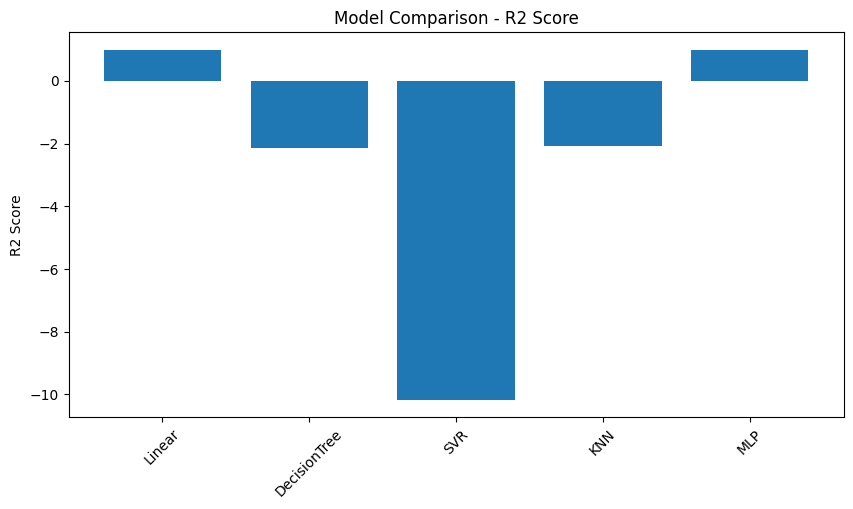

In [85]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
mse_scores = [results[m]["MSE"] for m in model_names]
r2_scores = [results[m]["R2"] for m in model_names]

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores)
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.title("Model Comparison - R2 Score")
plt.show()


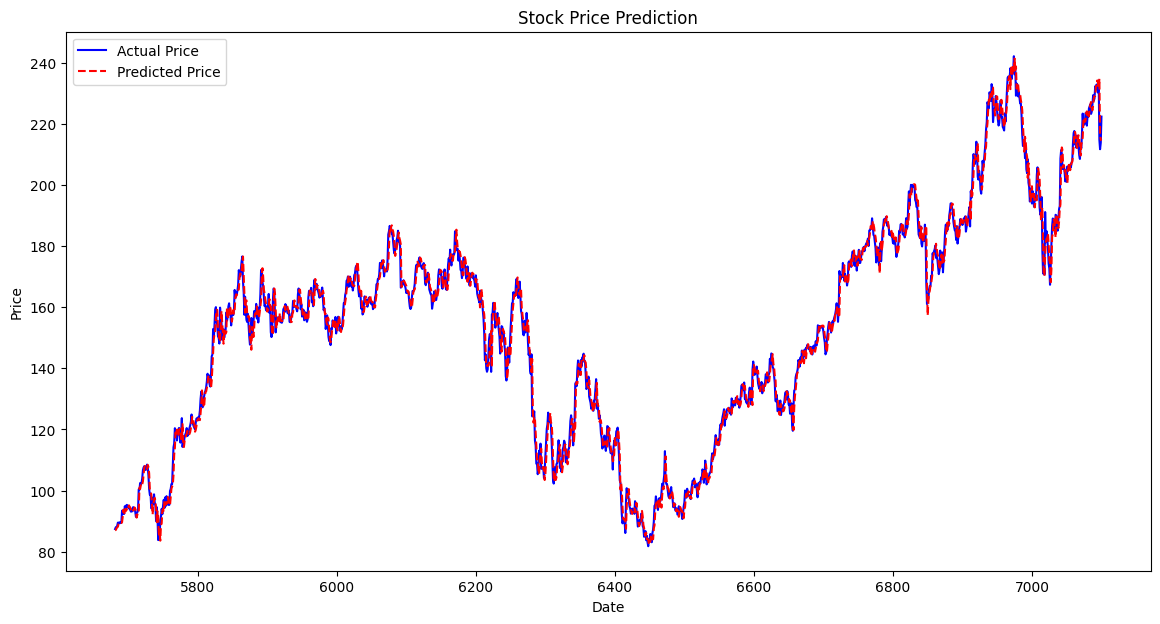

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Align lengths to avoid ValueError
min_len = min(len(y_test), len(y_pred))
plt.plot(y_test.index[:min_len], y_test.iloc[:min_len], color='blue', label='Actual Price')
plt.plot(y_test.index[:min_len], y_pred[:min_len], color='red', linestyle='--', label='Predicted Price')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


--- Model Performance on Test Data ---
Mean Squared Error (MSE): 22922.71
R-squared (R²) Score: -15.90


/home/yogesh/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


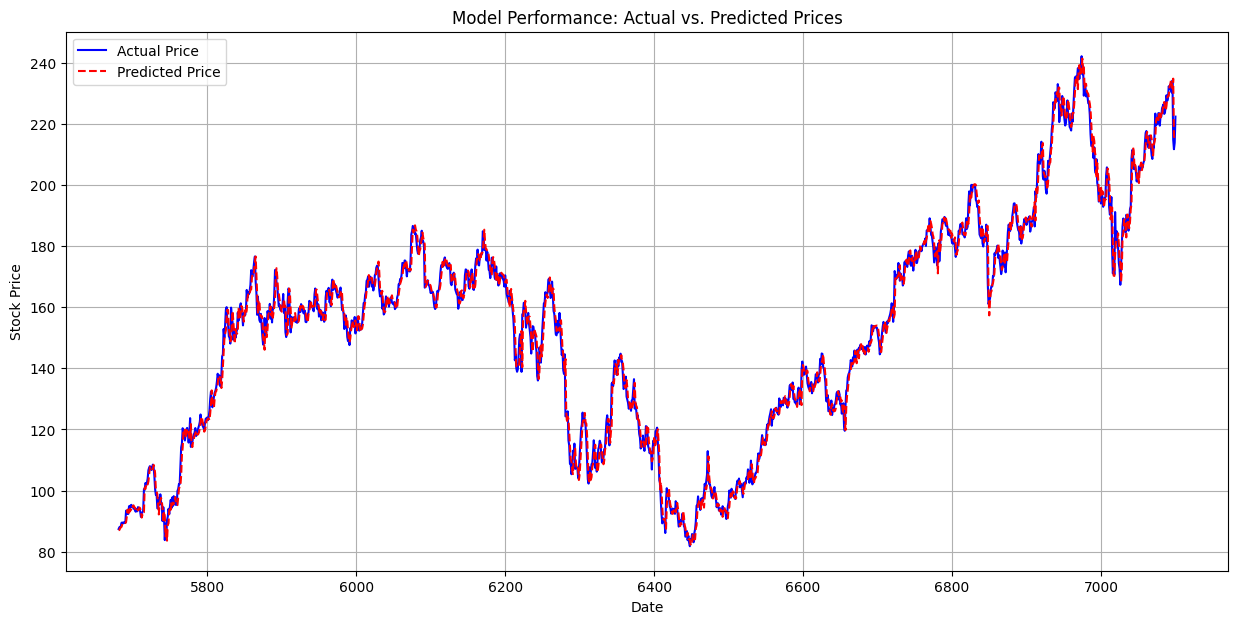

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Use the trained model to make predictions on the entire test set
y_pred_test = lr.predict(X_test_scaled)

# --- EVALUATION METRICS ---
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("\n--- Model Performance on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

# --- VISUALIZE PREDICTIONS VS ACTUALS ---
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, color='blue', label='Actual Price')
plt.plot(y_test.index, y_pred, color='red', linestyle='--', label='Predicted Price')

plt.title('Model Performance: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import joblib
#
joblib.dump(best_rf, "best_stock_model.pkl")


['best_stock_model.pkl']

In [105]:

# --- 4. PREDICTING THE NEXT DAY (FIXED) ---

# Get the last row of the original feature data (it has 5 columns)
# This will be used to predict the day after the last day in the dataset.
last_known_data = df[features_to_lag].iloc[-1:].values

print("Using last known data (5 features) for prediction:")
print(last_known_data)
print("-" * 50)


# Scale these 5 features using the scaler that was trained on 5 features.
# This will now work without a ValueError.

# Predict the next day's closing price
predicted_price_next_day = lr.predict(last_known_data)

print(f"✅ Predicted Closing Price for the Next Day: ${predicted_price_next_day[0]:.4f}")


Using last known data (5 features) for prediction:
[[2.14699997e+02 2.22649994e+02 2.13740005e+02 2.22309998e+02
  5.47149000e+07]]
--------------------------------------------------
✅ Predicted Closing Price for the Next Day: $222.1187


/home/yogesh/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
import joblib

# --- SAVE THE MODEL AND THE SCALER ---

# Define filenames for your files
model_filename = 'stock_price_model.joblib'
scaler_filename = 'scaler.joblib'

# Save the trained model to a file
joblib.dump(lr, model_filename)

# Save the fitted scaler to a file
joblib.dump(scaler, scaler_filename)

print(f"Model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")

Model saved to stock_price_model.joblib
Scaler saved to scaler.joblib


In [ ]:
import joblib
import numpy as np

# --- LOAD THE SAVED MODEL AND SCALER ---

# Load the model from the file
loaded_model = joblib.load('stock_price_model.joblib')

# Load the scaler from the file
loaded_scaler = joblib.load('scaler.joblib')

print("✅ Model and scaler loaded successfully!")


# --- MAKE A PREDICTION WITH THE LOADED OBJECTS ---

# Example: Let's pretend we have a new day's data
# [Open, High, Low, Close, Volume]

# 1. Scale the new data using the LOADED scaler

# 2. Make a prediction using the LOADD model

print(f"\nPrediction for new data: ${prediction[0]:.2f}")

✅ Model and scaler loaded successfully!

Prediction for new data: $8.48


/home/yogesh/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/yogesh/ml_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
